A simple setup to optimise our trading without taking a bad financial decisions due to investors emotions, market noises and false signals. There it comes the idea of setting up a straigth rules of trading and automatizing our trades. There are tree advantages of choosing a bot and not humain to supervise our financial wallet:

** First, the bot is tested in the historical data of the choosen market, so we will target the high profability and shrank the risk.

++ For the invertors that are not free for analysing the market they want invest in, simple set up we will make a good investor in a glimpse of an eye.

-- It's an open source code, to get used properly 

In [1]:
# libraries we need in our research:

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from backtesting import Strategy

def compute_rsi(data, window):
    # Convert to pandas Series for calculation
    close_prices = pd.Series(data.Close)
    delta = close_prices.diff()
    
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi.values

class RSI_SIGNAL(Strategy):
    window = 5
    rsi_enter = 70
    rsi_exit = 60
    
    def init(self):
        self.rsi= self.I(compute_rsi, self.data, self.window)
        
        
    def next(self):
   
        if  self.rsi > self.rsi_enter and not self.position:
            self.buy()
                    
        if self.rsi < self.rsi_exit:
            self.position.close()

In [4]:
%%time 

from backtesting import Backtest

# Fetch data
Ticker = yf.Ticker('BTC-USD')
data = Ticker.history(period='max', interval='1d')

# Run backtest
bt = Backtest(data, RSI_SIGNAL, cash=10000, commission=0.002)
output = bt.run()

print(output)
bt.plot()

stats, heatmap = bt.optimize(
    window=range(4, 50, 1),
    rsi_enter=range(50, 75, 5),
    rsi_exit=range(50, 75, 5),
    constraint=lambda p : p.rsi_exit < p.rsi_enter,
    maximize='Return [%]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

<timed exec>:8: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported by this class. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (see e.g. class `backtesting.lib.FractionalBacktest`.
/Users/mehdi/Library/Python/3.9/lib/python/site-packages/backtesting/_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/mehdi/Library/Python/3.9/lib/python/site-packages/backtesting/_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2014-09-17 00:00...
End                       2025-12-07 00:00...
Duration                   4099 days 00:00:00
Exposure Time [%]                    44.60976
Equity Final [$]                 237035.43167
Equity Peak [$]                  353259.87721
Commissions [$]                  146983.09044
Return [%]                         2270.35432
Buy & Hold Return [%]             22818.87874
Return (Ann.) [%]                    32.55372
Volatility (Ann.) [%]                52.36378
CAGR [%]                             32.56283
Sharpe Ratio                          0.62168
Sortino Ratio                         1.40582
Calmar Ratio                          0.54008
Alpha [%]                         -5078.01794
Beta                                  0.32203
Max. Drawdown [%]                    -60.2761
Avg. Drawdown [%]                   -11.98809
Max. Drawdown Duration     1509 days 00:00:00
Avg. Drawdown Duration      103 days 00:00:00
# Trades                          

/Users/mehdi/Library/Python/3.9/lib/python/site-packages/bokeh/util/serialization.py:243: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/Users/mehdi/Library/Python/3.9/lib/python/site-packages/backtesting/backtesting.py:1624: RuntimeWarning: If you want to use multi-process optimization with `multiprocessing.get_start_method() == 'spawn'` (e.g. on Windows),set `backtesting.Pool = multiprocessing.Pool` (or of the desired context) and hide `bt.optimize()` call behind a `if __name__ == '__main__'` guard. Currently using thread-based paralellism, which might be slightly slower for non-numpy / non-GIL-releasing code. See https://github.com/kernc/backtesting.py/issues/1256
  output = _optimize_grid()
/Users/mehdi/Library/Python/3.9/lib/python/site-packages/backtesting/backtesting.py:1637: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  for stats in (bt.run(**params)
/Users/mehdi/Library/Python/3.9/lib/python/site-packages/backtesting/backtesting.py:966: UserWarning: time=3450: Broker canceled the relative-sized order due to insu

CPU times: user 9.4 s, sys: 2.54 s, total: 11.9 s
Wall time: 10.6 s


Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/psm_1b584272'
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/psm_dcd3fe27'
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/psm_6ddc73fc'
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyErr

In [5]:
hm = heatmap.groupby(['rsi_enter', 'rsi_exit']).mean().unstack()
hm = hm[::-1]
hm

rsi_exit,50,55,60,65
rsi_enter,,,,
70,8482.650150,4979.955295,3430.206005,2933.020481
65,12039.880122,10722.432239,6284.402292,NaN
60,15610.334408,13480.202276,NaN,NaN
55,21583.751946,NaN,NaN,NaN


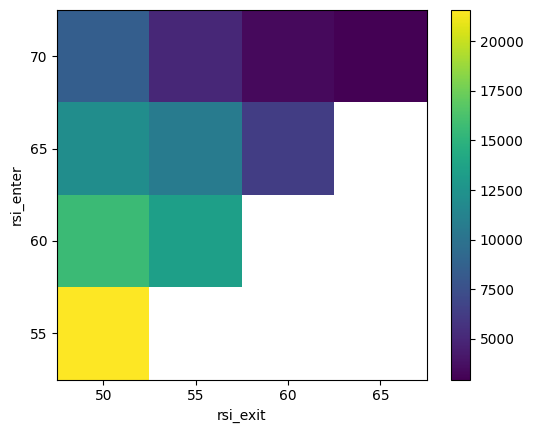

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(hm, cmap='viridis')
_ = (
    ax.set_xticks(range(len(hm.columns)), labels=hm.columns),
    ax.set_yticks(range(len(hm)), labels=hm.index),
    ax.set_xlabel('rsi_exit'),
    ax.set_ylabel('rsi_enter'),
    ax.figure.colorbar(im, ax=ax),
)